<h2>Assignment 1 - Part 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [2]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model #gets data
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [3]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

In [4]:
print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
print(data.shape) #row, coloumns

(506, 13)


<h4>Use scikit-learn library in the following cell</h4>

1
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

2
intercept:
[30.28894834]

coefficents:
[[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]

3

training dataset error:
21.641574096655585

testing data error:
24.311426929693297

4


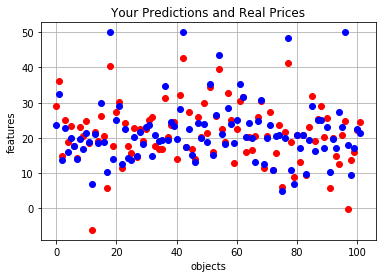

In [6]:
# Task 1-1: use linear regression in sklearn
print('1')

datalinmod = linear_model.LinearRegression() #getting data of linear model
datalinmod = datalinmod.fit(train_data, train_target) #fit(X, y, sample_weight=None)
print(datalinmod)

#__________________________________________________________
# Task 1-2: show intercept and coefficents
print('\n2')

intercept = datalinmod.intercept_
print('intercept:')
print(intercept)

coef = datalinmod.coef_
print('\ncoefficents:')
print(coef)

#__________________________________________________________
# Task 1-3: show errors on training dataset and testing dataset
print('\n3')

#print('train:')
predtraindata = datalinmod.predict(train_data)
#print(predtraindata)
#print('\ntesting data:')
predtestdata = datalinmod.predict(test_data)
#print(predtestdata)


print('\ntraining dataset error:')
n1 = np.subtract(predtraindata, train_target)
n2 = np.square(n1).mean()
print(n2)

print('\ntesting data error:')
n3 = np.subtract(predtestdata, test_target)
n4 = np.square(n3).mean()
print(n4)

#__________________________________________________________
# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
print('\n4')

plt.ylabel('features')
plt.xlabel('objects')
plt.title('Your Predictions and Real Prices')
plt.grid()
plt.plot(predtestdata, 'ro') #red circles
plt.plot(test_target, 'bo')  #blue circles
plt.show()

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

intercept:
[30.28894834]

coefficents:
[[-1.12463481e-01  3.00810168e-02  4.07309919e-02  2.78676719e+00
  -1.72406347e+01  4.43248784e+00 -6.23998173e-03 -1.44848504e+00
   2.62113793e-01 -1.06390978e-02 -9.16398679e-01  1.24516469e-02
  -5.09349120e-01]]

train dataset error:
21.641574096655578

testing dataset error:
24.311426929695195


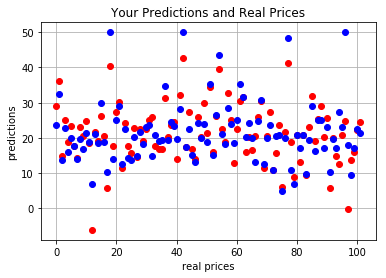

In [7]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
    X_transpose = X.T  
    normaleq= np.linalg.inv(X_transpose.dot(X))
    normaleq = normaleq.dot(X_transpose)
    normaleq = normaleq.dot(y)
    return normaleq # returns a list  
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):  
    #w^T * X
    prediction = np.sum(np.multiply(w.T, X), axis = 1)
    return prediction

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# Task 2-3: show intercept and coefficents
intercept2 = w[0][0]
print('intercept:')
print(intercept)

print('\ncoefficents:')
print(coef)

# Task 2-4: show errors on training dataset and testing dataset
predtrain = myPredictFun(train_data_intercept, w)          #get prediction for train dataset
predtrain = np.reshape(predtrain, (predtrain.shape[0],1))  #reshape
predtest = myPredictFun(test_data_intercept, w)            #get prediction for test dataset
predtest = np.reshape(predtest, (predtest.shape[0],1))     #reshape


print('\ntrain dataset error:')
m1 = np.subtract(predtrain, train_target)
m2 = np.square(m1).mean()
print(m2)

print('\ntesting dataset error:')
m3 = np.subtract(predtest, test_target)
m4 = np.square(m3).mean()
print(m4)


# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset

plt.ylabel('predictions')
plt.xlabel('real prices')
plt.title('Your Predictions and Real Prices')
plt.grid()
plt.plot(predtest, 'ro') #red circles
plt.plot(test_target, 'bo')  #blue circles
plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>


intercept:
22.796534653465336

coefficents:
[22.79653465 -0.9959922   0.69501597  0.2793815   0.7195102  -2.02666553
  3.1410082  -0.17457063 -3.08308698  2.24540329 -1.76206124 -2.0397505
  1.13871984 -3.6170184 ]

train dataset error:
21.641575757167214

testing dataset error:
24.313308056730786


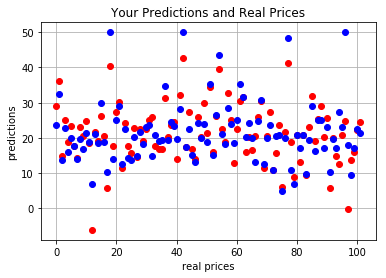

In [25]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    
    w = 0
    n = X.shape[0]
    
    for i in range (numItrs):

        w = (w + (learning_rate/n)* X.T.dot(np.subtract(y ,(X.dot(w)))))
        
    return w[:,0]

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    #w^T * X
    prediction = np.sum(np.multiply(w.T, X), axis = 1)
    return prediction

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept, train_target, 0.1, 1000)

# Task 3-3: show intercept and coefficents
print('\nintercept:')
print(w[0])

print('\ncoefficents:')
print(w)

# Task 3-4: show errors on training dataset and testing dataset
predtrain = myPredictFun(train_data_intercept, w)          #get prediction for train dataset
predtrain = np.reshape(predtrain, (predtrain.shape[0],1))  #reshape
predtest = myPredictFun(test_data_intercept, w)            #get prediction for test dataset
predtest = np.reshape(predtest, (predtest.shape[0],1))     #reshape


print('\ntrain dataset error:')
m1 = np.subtract(predtrain, train_target)
m2 = np.square(m1).mean()
print(m2)

print('\ntesting dataset error:')
m3 = np.subtract(predtest, test_target)
m4 = np.square(m3).mean()
print(m4)

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset

plt.ylabel('predictions')
plt.xlabel('real prices')
plt.title('Your Predictions and Real Prices')
plt.grid()
plt.plot(predtest, 'ro') #red circles
plt.plot(test_target, 'bo')  #blue circles
plt.show()